In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events = pd.read_csv('events.csv')
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('installs.csv')
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('auctions.csv')
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('clicks.csv')

In [3]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [4]:
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)

In [5]:
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')

In [6]:
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)

In [7]:
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)

In [8]:
################################################################
## EVENTS.
################################################################
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################

In [9]:
################################################################
## CLICKS.
################################################################
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################

In [10]:
################################################################
## INSTALLS.
################################################################
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################

In [11]:
################################################################
## AUCTIONS.
################################################################
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################

In [12]:
################################################################
## EJEMPLO DE MERGE.
################################################################
## pd.merge(eventos_por_usuario, y_train, on='trans_id', how='inner')

In [13]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 28 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null category
user_agent            1729 non-null category
event_uuid            865 non-null object
kind                  865 non-null category
wifi                  1729 non-null object
trans_id              6 non-null category
ip_address            3412 non-null int64
device_language       3378 non-null float64
mes                   3412 non-null int64
dia                   3412 non-null int64
hora                  3412 non-n

In [14]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 17 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
mes                int64
dia                int64
hora               int64
nombre_dia         category
nombre_mes         category
hora_madrugada     int64
hora_maniana       int64
hora_almuerzo      int64
hora_tarde         int64
hora_noche         int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(13)
memory usage: 2.2 GB


In [15]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 30 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null datetime64[ns]
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
mes                26351 non-null int64
dia                26351 n

In [17]:
events['event_id'].value_counts()

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
310     42101
155     38465
273     37056
23      35588
21      26228
98      24301
158     23738
272     22788
80      22076
50      20905
81      18622
346     14408
58      13940
51      13455
513     12682
354     11711
133     11074
256     10939
274     10035
60       9456
        ...  
500         1
511         1
532         1
516         1
132         1
520         1
521         1
523         1
575         1
577         1
578         1
579         1
608         1
433         1
597         1
436         1
589         1
588         1
587         1
586         1
585         1
140         1
583         1
581         1
580         1
437         1
443         1
227         1
226         1
584         1
Name: event_id, Length: 568, dtype: int64

In [18]:
df_heat = events[events["event_id"] == 22].groupby(["hora", "nombre_dia"])["event_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])


df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='event_id', aggfunc='sum')

Text(81.8,0.5,'Horario')

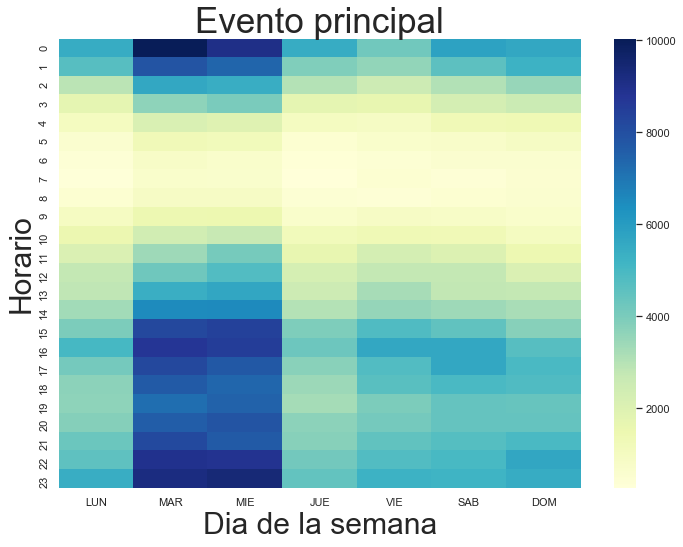

In [19]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Evento principal", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)